In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* **There is no null value but i think there is many columns contain many zero values** 

In [7]:
df_copy = df.copy()
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df_copy[['Glucose' ,'BloodPressure', 'SkinThickness', 'Insulin','Age']]=df_copy[['Glucose' ,'BloodPressure', 'SkinThickness', 'Insulin','Age']].replace(0,np.NaN)
df_copy[['BMI', 'DiabetesPedigreeFunction']] = df_copy[['BMI', 'DiabetesPedigreeFunction']].replace(0.0,np.NaN)
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

* We have not mentioned Pregnancies because it could be zero 
* We can see that  there is so many null(zero) values in the dataset

In [9]:
column = df_copy.columns
column

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# EDA

#### We visualize outlier using boxplot to handle outlier

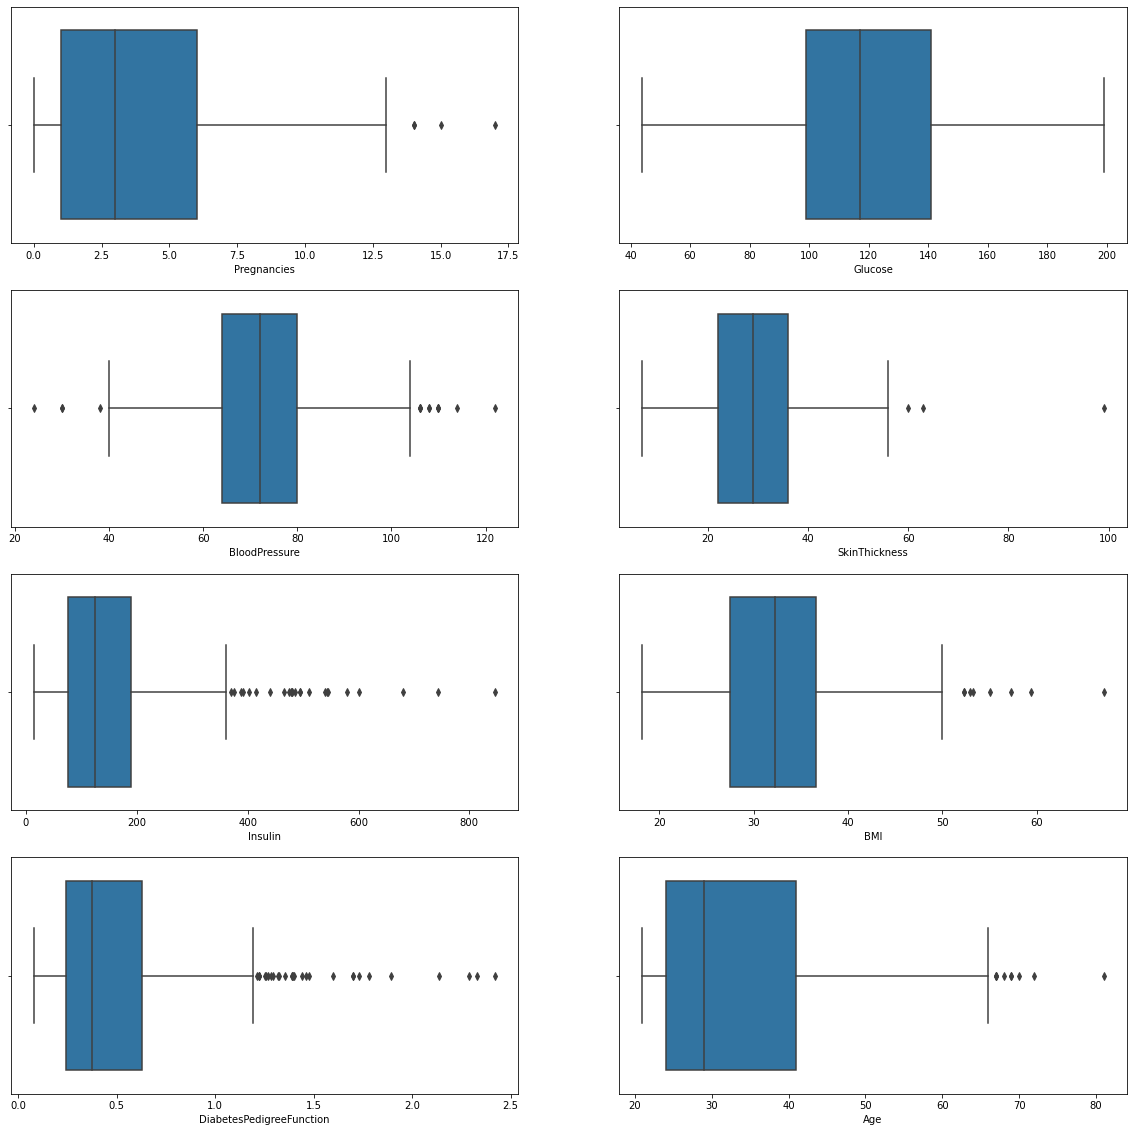

In [10]:
plt.figure(figsize=(20,20))
for i in range(0,len(column)-1):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=column[i],data=df_copy)
plt.show()

* we can see that in Insulin, BMI,BloodPressure has many outlier so we can handle null value in these columns using median and ohter column null value handle using mean

In [11]:
df_copy['Glucose'].fillna(df['Glucose'].mean(),inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].median(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].mean(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace=True)
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


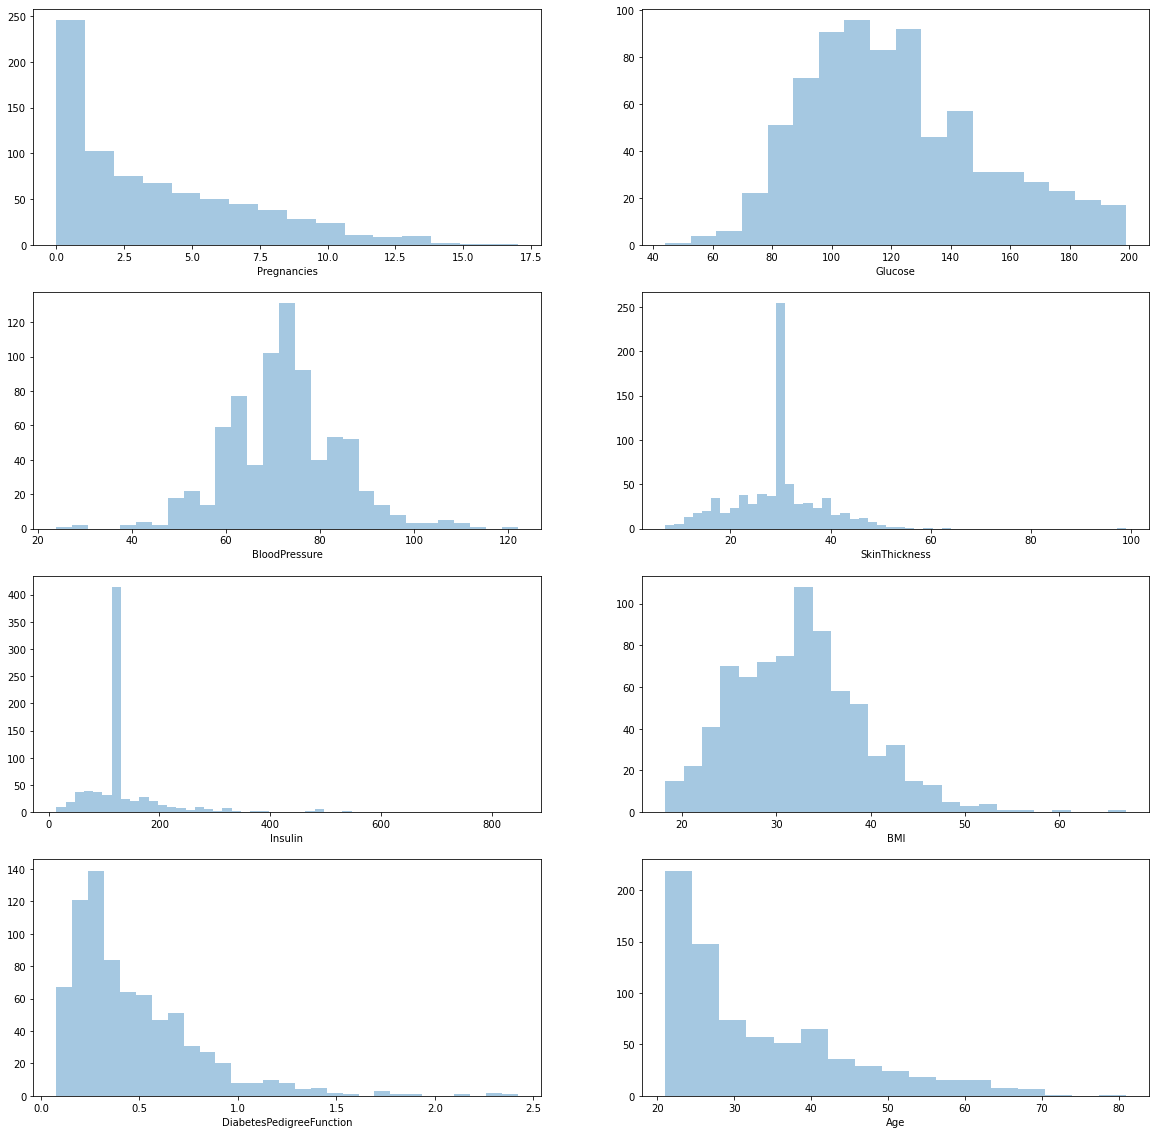

In [12]:
plt.figure(figsize=(20,20))
for i in range(0,len(column)-1):
    plt.subplot(4,2,i+1)
    sns.distplot(df_copy[column[i]],kde=False)
plt.show()

## Many features are right skewed we can handle using StandardScale

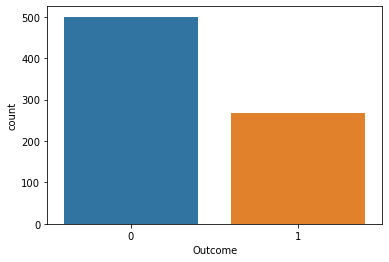

0    500
1    268
Name: Outcome, dtype: int64


In [13]:
sns.countplot(x=df_copy['Outcome'])
plt.show()
print(df_copy['Outcome'].value_counts())

* **Here data is biased towards to 0 means non-diabetes but it is not high bias so we can't apply Over sampling or Under Sampling** 

[]

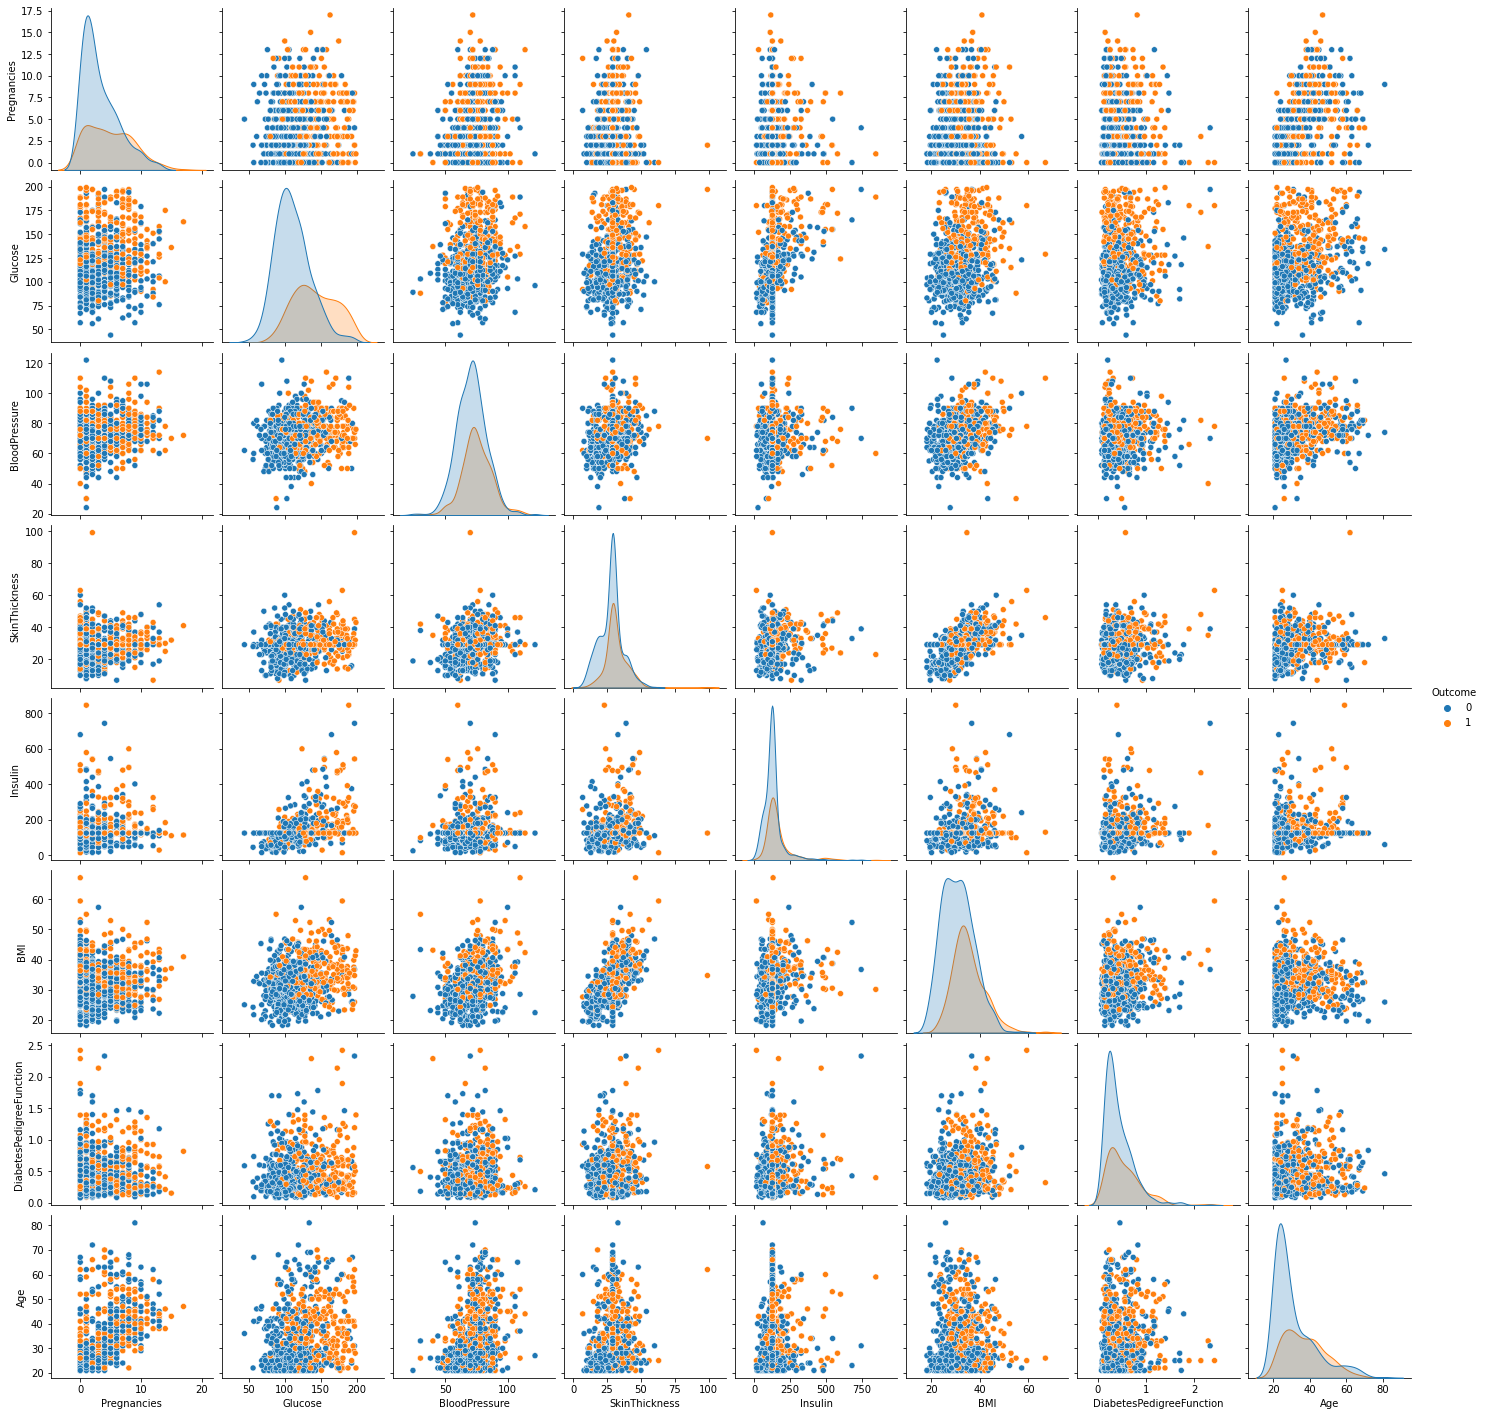

In [14]:
sns.pairplot(df_copy,hue='Outcome')
plt.plot()

### Now we see relation between differant features and target variable using heatmap

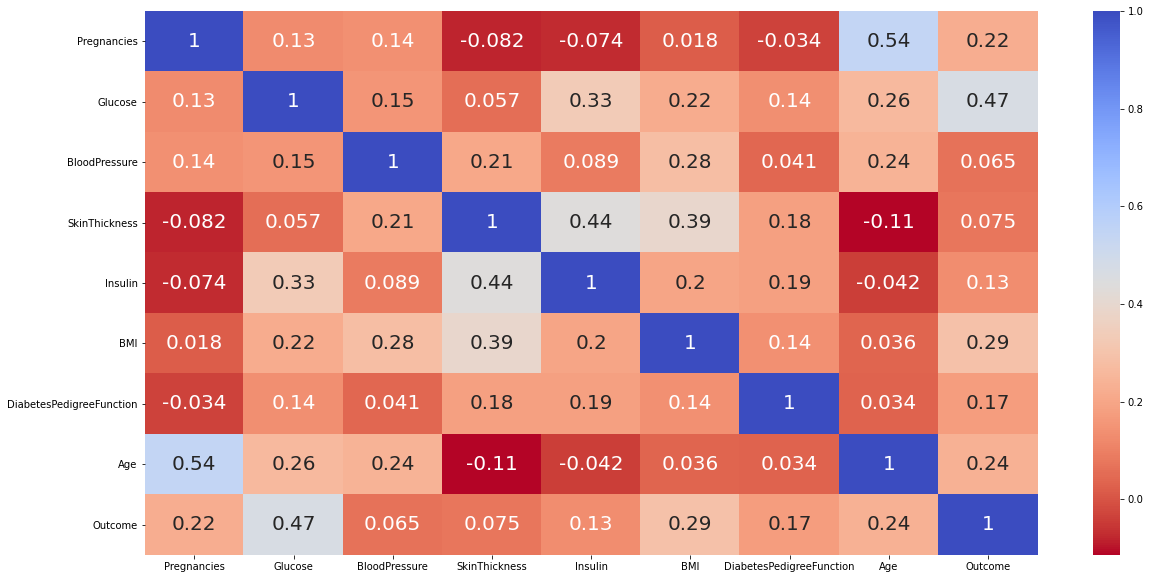

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='coolwarm_r',annot=True,annot_kws={'fontsize':8, 'size':20})
plt.show()

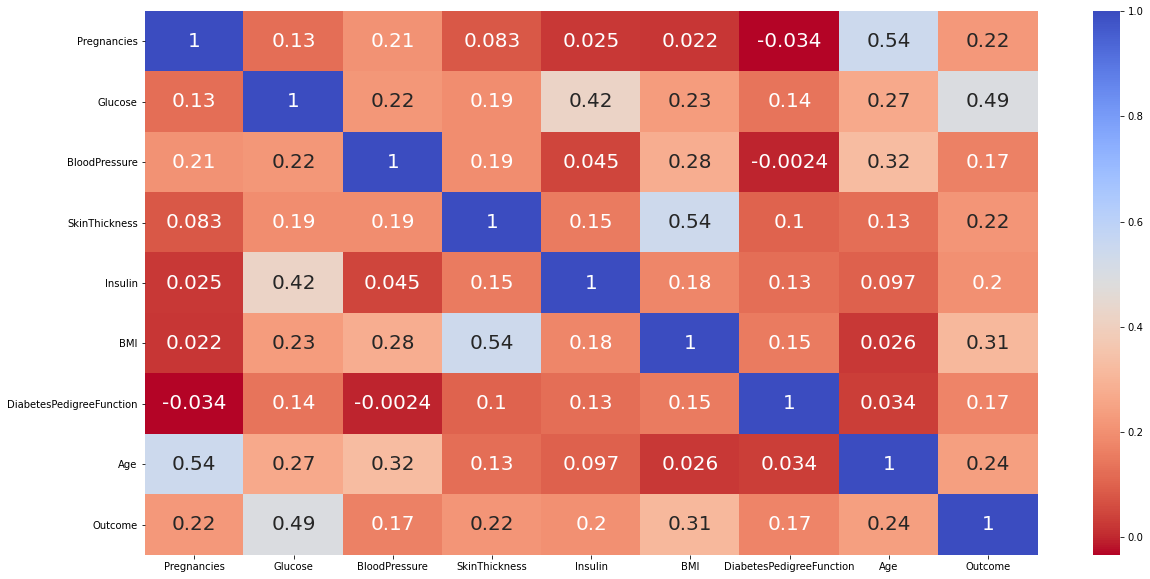

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df_copy.corr(),cmap='coolwarm_r',annot=True,annot_kws={'fontsize':8, 'size':20})
plt.show()

* **we can see that outlier handle data are more correlate with outcome than without outlier handle data**

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
X = df_copy.drop('Outcome',axis=1)
y = df_copy['Outcome']
X.shape , y.shape

((768, 8), (768,))

In [19]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/3,random_state=42)

In [21]:
x_train.shape,x_test.shape

((512, 8), (256, 8))

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGB": XGBClassifier(use_label_encoder=False,eval_metric='mlogloss'),
    "Gradient":GradientBoostingClassifier(),
    "RidgeClassi":RidgeClassifier()
}

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [25]:
# now let's calculate cross_val_score of different algorithm
for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    training_score = cross_val_score(classifier, x_test, y_test, cv=kfold)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")


Classifiers:  LogisticRegression Has a training score of 78.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 75.0 % accuracy score
Classifiers:  SVC Has a training score of 74.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 68.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 73.0 % accuracy score
Classifiers:  XGBClassifier Has a training score of 71.0 % accuracy score
Classifiers:  GradientBoostingClassifier Has a training score of 71.0 % accuracy score
Classifiers:  RidgeClassifier Has a training score of 77.0 % accuracy score


In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
logi = LogisticRegression()
logi.fit(x_train, y_train)
y_pred_logi = logi.predict(x_test)

acc_logi = accuracy_score(y_test, y_pred_logi)
conf_logi = confusion_matrix(y_test, y_pred_logi)
logi_report = classification_report(y_test, y_pred_logi)

print(f"Accuracy Score of Logistic Regression is : {acc_logi}")
print(f"Confusion Matrix : \n{conf_logi}")
print(f"Classification Report : \n{logi_report}")

Accuracy Score of Logistic Regression is : 0.7421875
Confusion Matrix : 
[[140  30]
 [ 36  50]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       170
           1       0.62      0.58      0.60        86

    accuracy                           0.74       256
   macro avg       0.71      0.70      0.71       256
weighted avg       0.74      0.74      0.74       256



In [27]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred_dtc = dtc.predict(x_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf_dtc = confusion_matrix(y_test, y_pred_dtc)
dtc_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf_dtc}")
print(f"Classification Report : \n{dtc_report}")

Accuracy Score of Decision Tree is : 0.6953125
Confusion Matrix : 
[[121  49]
 [ 29  57]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       170
           1       0.54      0.66      0.59        86

    accuracy                           0.70       256
   macro avg       0.67      0.69      0.68       256
weighted avg       0.72      0.70      0.70       256



In [28]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
y_pred_forest = forest.predict(x_test)

acc_forest = accuracy_score(y_test, y_pred_forest)
conf_forest = confusion_matrix(y_test, y_pred_forest)
forest_report = classification_report(y_test, y_pred_forest)

print(f"Accuracy Score of Random Forest is : {acc_forest}")
print(f"Confusion Matrix : \n{conf_forest}")
print(f"Classification Report : \n{forest_report}")

Accuracy Score of Random Forest is : 0.73046875
Confusion Matrix : 
[[135  35]
 [ 34  52]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       170
           1       0.60      0.60      0.60        86

    accuracy                           0.73       256
   macro avg       0.70      0.70      0.70       256
weighted avg       0.73      0.73      0.73       256



In [29]:
XGB = XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')
XGB.fit(x_train, y_train)
y_pred_xgb = XGB.predict(x_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf_xgb = confusion_matrix(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of Gradient Boosting Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf_xgb}")
print(f"Classification Report : \n{xgb_report}")

Accuracy Score of Gradient Boosting Classifier is : 0.7265625
Confusion Matrix : 
[[129  41]
 [ 29  57]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       170
           1       0.58      0.66      0.62        86

    accuracy                           0.73       256
   macro avg       0.70      0.71      0.70       256
weighted avg       0.74      0.73      0.73       256



In [30]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
y_pred_gbc = GBC.predict(x_test)

acc_gbc = accuracy_score(y_test, y_pred_gbc)
conf_gbc = confusion_matrix(y_test, y_pred_gbc)
gbc_report = classification_report(y_test, y_pred_gbc)

print(f"Accuracy Score of Gradient Boosting Classifier is : {acc_gbc}")
print(f"Confusion Matrix : \n{conf_gbc}")
print(f"Classification Report : \n{gbc_report}")

Accuracy Score of Gradient Boosting Classifier is : 0.73828125
Confusion Matrix : 
[[131  39]
 [ 28  58]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       170
           1       0.60      0.67      0.63        86

    accuracy                           0.74       256
   macro avg       0.71      0.72      0.72       256
weighted avg       0.75      0.74      0.74       256



In [31]:
ridge = RidgeClassifier()
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

acc_ridge = accuracy_score(y_test, y_pred_ridge)
conf_ridge = confusion_matrix(y_test, y_pred_ridge)
ridge_report = classification_report(y_test, y_pred_ridge)

print(f"Accuracy Score of Gradient Boosting Classifier is : {acc_ridge}")
print(f"Confusion Matrix : \n{conf_ridge}")
print(f"Classification Report : \n{ridge_report}")

Accuracy Score of Gradient Boosting Classifier is : 0.75
Confusion Matrix : 
[[142  28]
 [ 36  50]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       170
           1       0.64      0.58      0.61        86

    accuracy                           0.75       256
   macro avg       0.72      0.71      0.71       256
weighted avg       0.75      0.75      0.75       256



In [32]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred_svc = ridge.predict(x_test)

acc_svc = accuracy_score(y_test, y_pred_svc)
conf_svc = confusion_matrix(y_test, y_pred_svc)
svc_report = classification_report(y_test, y_pred_svc)

print(f"Accuracy Score of Gradient Boosting Classifier is : {acc_svc}")
print(f"Confusion Matrix : \n{conf_svc}")
print(f"Classification Report : \n{svc_report}")

Accuracy Score of Gradient Boosting Classifier is : 0.75
Confusion Matrix : 
[[142  28]
 [ 36  50]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       170
           1       0.64      0.58      0.61        86

    accuracy                           0.75       256
   macro avg       0.72      0.71      0.71       256
weighted avg       0.75      0.75      0.75       256



In [33]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf_knn = confusion_matrix(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of Gradient Boosting Classifier is : {acc_knn}")
print(f"Confusion Matrix : \n{conf_knn}")
print(f"Classification Report : \n{knn_report}")

Accuracy Score of Gradient Boosting Classifier is : 0.7109375
Confusion Matrix : 
[[132  38]
 [ 36  50]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       170
           1       0.57      0.58      0.57        86

    accuracy                           0.71       256
   macro avg       0.68      0.68      0.68       256
weighted avg       0.71      0.71      0.71       256



## Apply Hyperparameter Tuning on Random Forest

In [34]:
#RandomForestClassifier
random_forest_param = {'n_estimators':[10,50,100,150,200], 'max_features' : ['sqrt', 'log2']}
grid_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid=random_forest_param)
grid_forest.fit(x_train,y_train)
#forest best estimator
forest = grid_forest.best_estimator_
print(forest)
y_pred_forest = forest.predict(X)

acc_forest = accuracy_score(y, y_pred_forest)
conf_forest = confusion_matrix(y, y_pred_forest)
forest_report = classification_report(y, y_pred_forest)

print(f"Accuracy Score of Random Forest is : {acc_forest}")
print(f"Confusion Matrix : \n{conf_forest}")
print(f"Classification Report : \n{forest_report}")

RandomForestClassifier(max_features='sqrt', n_estimators=10)
Accuracy Score of Random Forest is : 0.9075520833333334
Confusion Matrix : 
[[471  29]
 [ 42 226]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       500
           1       0.89      0.84      0.86       268

    accuracy                           0.91       768
   macro avg       0.90      0.89      0.90       768
weighted avg       0.91      0.91      0.91       768



## Here we balance data using SMOTE apply Random Forest

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(x_train,y_train)

In [36]:
forest = RandomForestClassifier(n_estimators=150, max_features='sqrt')
forest.fit(X_smote, y_smote)
y_pred_forest = forest.predict(X)

acc_forest = accuracy_score(y, y_pred_forest)
conf_forest = confusion_matrix(y, y_pred_forest)
forest_report = classification_report(y, y_pred_forest)

print(f"Accuracy Score of Random Forest is : {acc_forest}")
print(f"Confusion Matrix : \n{conf_forest}")
print(f"Classification Report : \n{forest_report}")

Accuracy Score of Random Forest is : 0.9153645833333334
Confusion Matrix : 
[[458  42]
 [ 23 245]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       500
           1       0.85      0.91      0.88       268

    accuracy                           0.92       768
   macro avg       0.90      0.92      0.91       768
weighted avg       0.92      0.92      0.92       768



* **we can get highest accuracy on this dataset using Random Forest Classifier**
* **Over-Sampling did not contribute well to increase accuracy**